In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from random import randint

Acá están las funciones que vamos a utilizar, también están definidas sus derivadas y sus raíces para poder colorear los fractales con base en ellas.

In [2]:
def fcube1(z):
    return z ** 3 - 1
def dfcube1(z):
    return 3*z ** 2
rcube1=[1,complex(-0.5, math.sin(2*math.pi/3)),complex(-0.5, -1*math.sin(2*math.pi/3))]    

In [3]:
def fcube2(z):
    return z ** 3 - 2* z + 2
def dfcube2(z):
    return 3*z ** 2 -2
rcube2=[-1.7693,complex(0.88465, -0.58974),complex(0.88465, 0.58974)]

In [4]:
def f6(z):
    return z ** 6 + z **3 - 1
def df6(z):
    return 6*z ** 5 + 3* z**2
r6=[-1.1740,0.85180,complex(0.58699, 1.01670),complex(0.58699, -1.01670),complex(-0.42590, -0.73768),complex(-0.42590, 0.73768)]

In [5]:
def f8(z):
    return z ** 8 + 15*z **4 - 16
def df8(z):
    return 8*z ** 7 + 60* z**3
r8=[-1,1,complex(0, 1),complex(0, -1),complex(-1.4142, -1.4142),complex(-1.4142, 1.4142),complex(1.4142, -1.4142),complex(1.4142, 1.4142)]

In [6]:
#función utilizada para obtener un color en RGB a partir de un entero
def int2rgb(rgbint):
    blue =  rgbint & 255
    green = (rgbint >> 8) & 255
    red =   (rgbint >> 16) & 255
    return (red, green, blue)

Se modificó la función newton_set1 para recibir la función, derivadas y colores para la generación de la imagen. También se modificaron los parámetros de display.



In [7]:
def newton_set1(f,df, roots, color, m=1, z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed
    
    
    # Bounding roots
    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 0
    # Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m * f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext
                converge= False                
                for j in range(len(roots)):
                    if abs(z-roots[j])<eps:
                        pixels[height-y-1,x] = (color[j][0]-count*multcol if color[j][0]>0 else color[j][0],
                                                color[j][1]-count*multcol if color[j][1]>0 else color[j][1],
                                                color[j][2]-count*multcol if color[j][2]>0 else color[j][2])
                        converge = True
                        break
                if not converge:
                    pixels[height-y-1,x] = (0, 0, 0)
 
    return pixels

In [9]:
def display1(f,df,roots, color, m=1,z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(f,df,roots,color,m =m, z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter)
    plt.title('Newton Fractal')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()

Al hacer las gráficas en los reales de las funciones elegidas podemos ver sus raices reales en el corte con el eje x

Text(0, 0.5, 'f(x)')

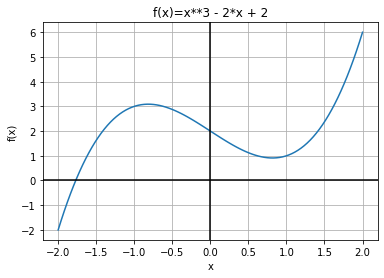

In [11]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,fcube2(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x**3 - 2*x + 2')
plt.xlabel('x')
plt.ylabel('f(x)')

Generamos los colores necesarios, al ser un polinomio de tercer grado, buscamos tres raíces incluyendo las complejas.Los fractales muestran hacia que raiz converge cada valor complejo asignandole el color relacionado con la raiz. Las zonas que están en negro representan valores para los que no se converge a ninguna raiz.

In [13]:
color = []
for i in range(3):
    color.append(int2rgb(randint(0, 0xFFFFFF)))

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


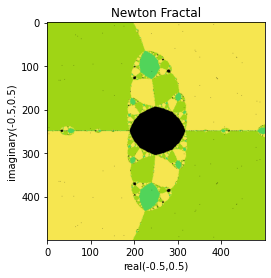

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


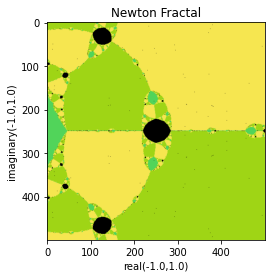

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


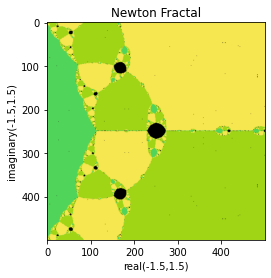

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


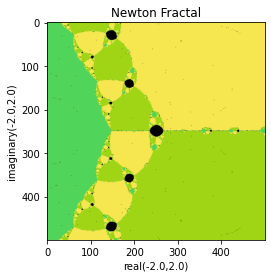

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


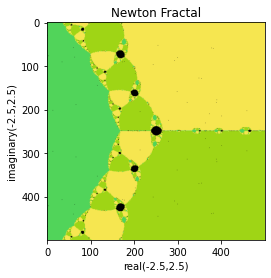

In [16]:
print("zoom out")
for i in range(5):
    display1(fcube2,dfcube2,rcube2,color,zoom=(i+1))

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


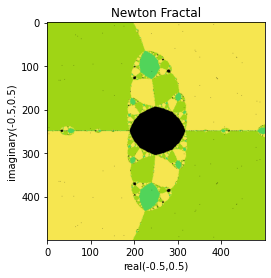

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


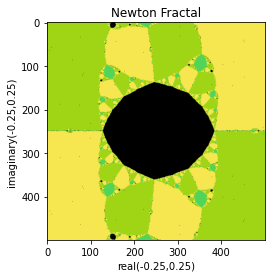

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


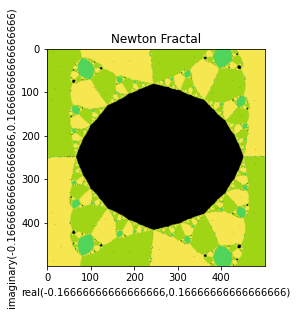

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


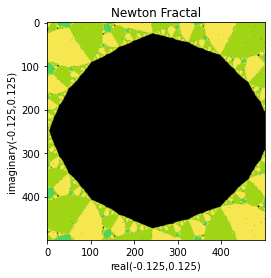

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


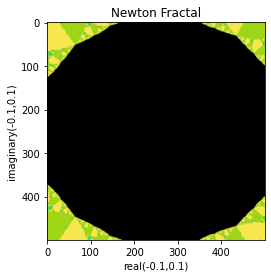

In [17]:
print("zoom in")
for i in range(5):
    display1(fcube2,dfcube2,rcube2,color,zoom=(1/(i+1)))

Generamos colores para $f(x)= x⁶ +x³ -1$ 

In [18]:
color = []
for i in range(6):
    color.append(int2rgb(randint(0, 0xFFFFFF)))

Gráfica en los reales

Text(0, 0.5, 'f(x)')

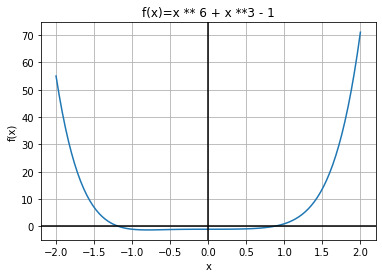

In [19]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f6(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x ** 6 + x **3 - 1')
plt.xlabel('x')
plt.ylabel('f(x)')

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


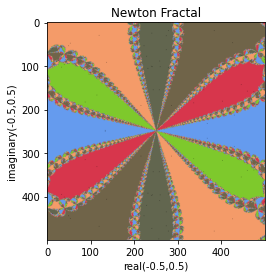

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


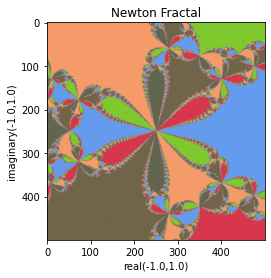

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


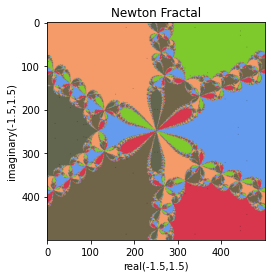

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


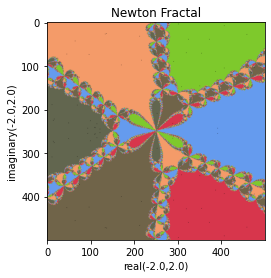

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


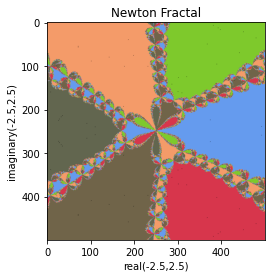

In [20]:
print("zoom out")
for i in range(5):
    display1(f6,df6,r6,color,zoom=(i+1))

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


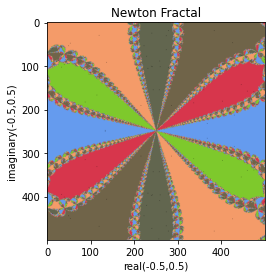

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


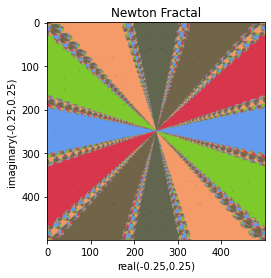

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


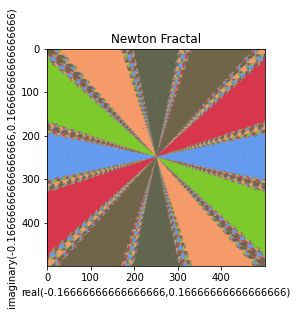

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


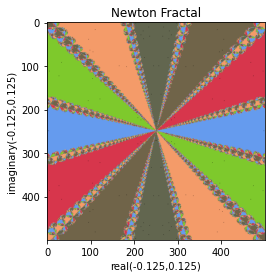

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


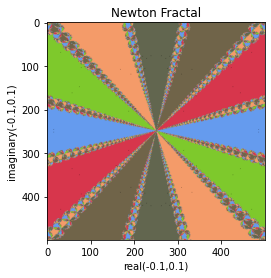

In [21]:
print("zoom in")
for i in range(5):
    display1(f6,df6,r6,color,zoom=(1/(i+1)))

Generamos colores para $f(x)= x⁸ +15x⁴ -16$ 

In [22]:
color = []
for i in range(8):
    color.append(int2rgb(randint(0, 0xFFFFFF)))

Text(0, 0.5, 'f(x)')

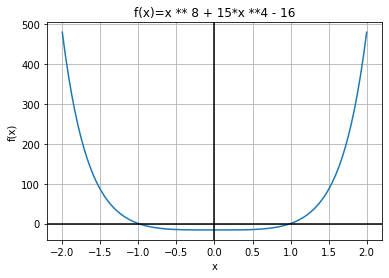

In [23]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,f8(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x ** 8 + 15*x **4 - 16')
plt.xlabel('x')
plt.ylabel('f(x)')

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


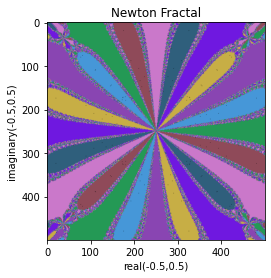

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


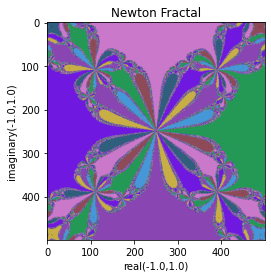

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


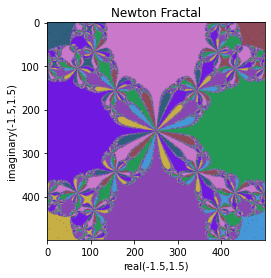

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


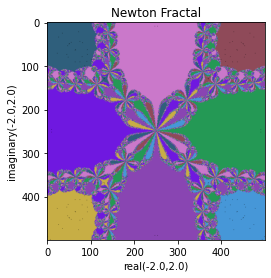

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


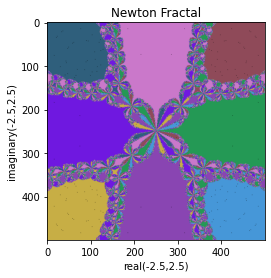

In [24]:
print("zoom out")
for i in range(5):
    display1(f8,df8,r8,color,zoom=(i+1))

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


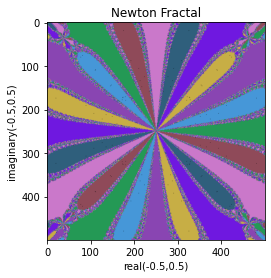

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


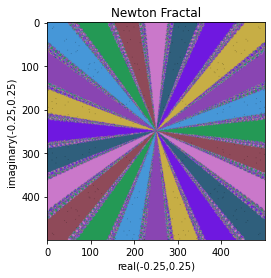

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


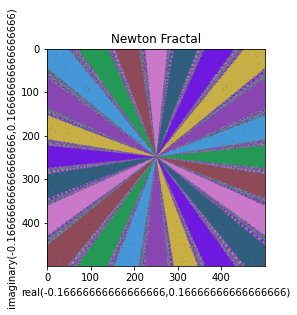

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


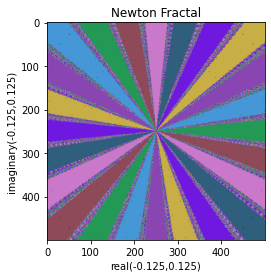

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


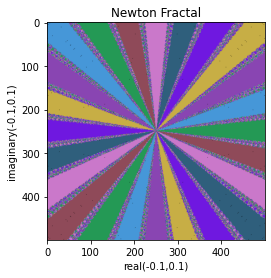

In [25]:
print("zoom in")
for i in range(5):
    display1(f8,df8,r8,color,zoom=(1/(i+1)))

A continuación se revisa la convergencia de cuatro valores complejos para cada una de las funciones escogidas, se muestran gráficas de como converge las partes del valor (real y compleja)

In [39]:
def newton_iterates(c,f,df):
    r=[]
    i=[]
    z = complex(c[0],c[1])
    for k in range(50):
        dz = df(z)
        if dz==0:
            break
        z = z - f(z) / dz # Newton iteration
        r.append(np.real(z))
        i.append(np.imag(z))
    plt.title('Newton iterates form z='+str(c[0])+', '+str(c[1])+'j')
    plt.plot(r)
    plt.ylabel('Real part')
    plt.show()
    plt.plot(i)
    plt.ylabel('Imagnary part')
    plt.show()

In [40]:
z=[[0.0 , 10.0],[-10.0, 10.0],[-10.0, -10.0],[0.0 , 0.0]]

En las siguientes gráficas podemos ver que los primeros tres valores hay una convergencia hacia las raices 0.88465 -0.58974j y 0.88465 + 0.58974j. En el último valor se puede apreciar que no se converge a ninguna raíz en concordancia con lo que se ve en las imagenes del fractal.




raíces de f(z)= z³-2z + 2


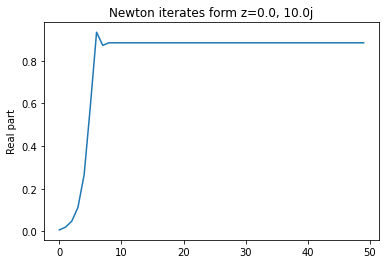

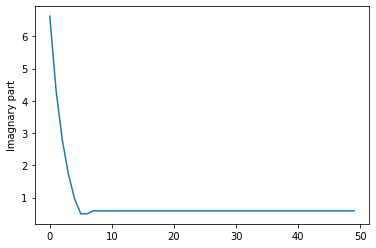

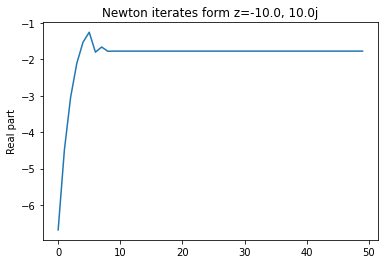

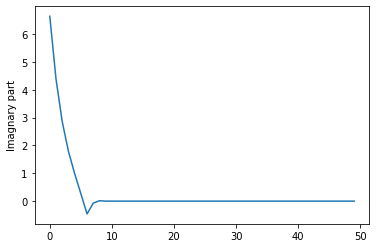

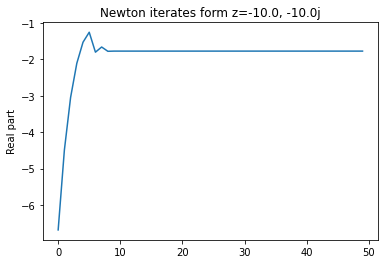

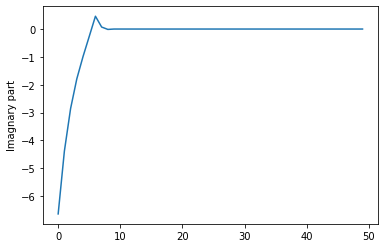

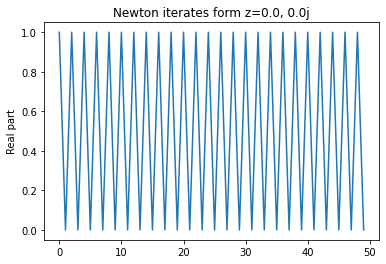

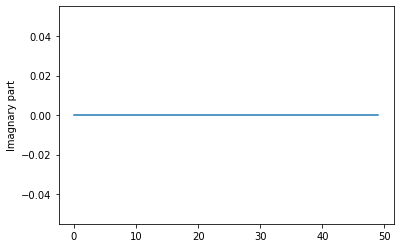

In [42]:
1print("raíces de f(z)= z³-2z + 2")
for zi in z:
    newton_iterates(zi,fcube2,dfcube2)

En las siguientes gráficas podemos ver que los primeros tres valores hay una convergencia hacia las raices -0.42590+ 0.73768j y -0.42590 -0.73768j. Para el último valor encontramos gráficas vacías porque el valor evaluado en la derivada es igual a cero.

raíces de f(z)= z⁶ + z³ -1


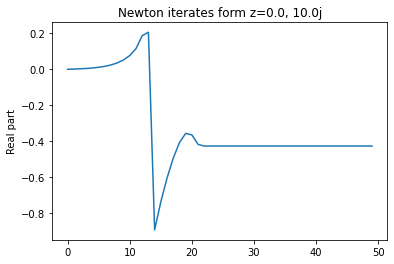

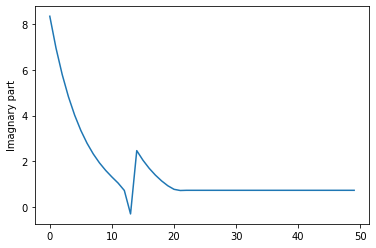

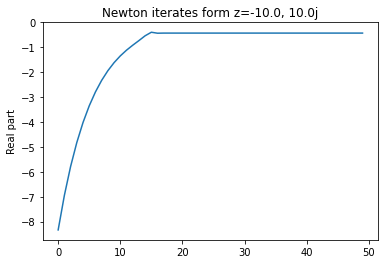

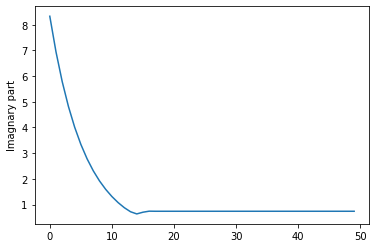

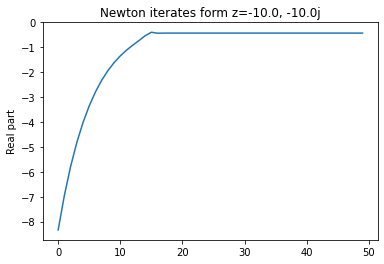

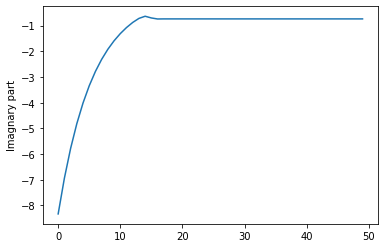

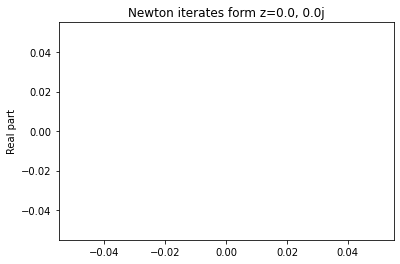

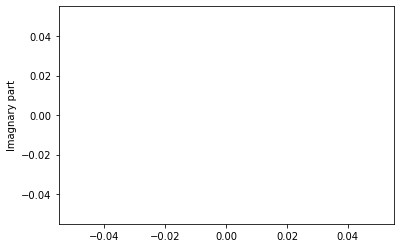

In [43]:
print("raíces de f(z)= z⁶ + z³ -1")
for zi in z:
    newton_iterates(zi,f6,df6)

En las siguientes gráficas podemos ver que los primeros tres valores hay una convergencia hacia las raices j, -1.4142+ 1.4142j, -1.4142- 1.4142j. Para el último valor encontramos gráficas vacías porque el valor evaluado en la derivada es igual a cero.

raíces de f(z)= z⁸ + 15z⁴ -16


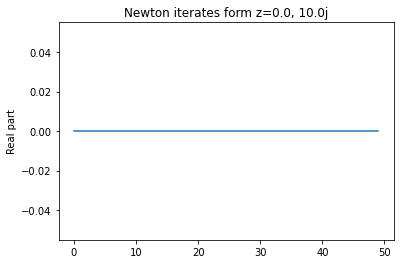

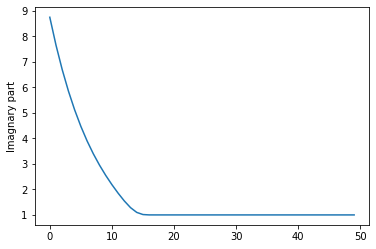

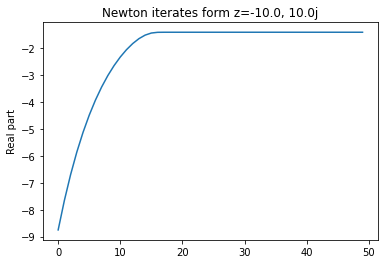

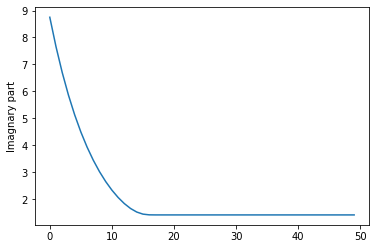

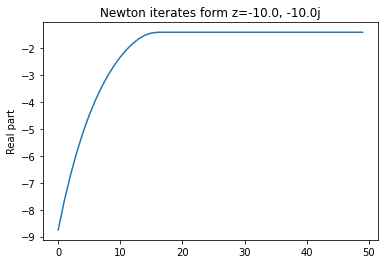

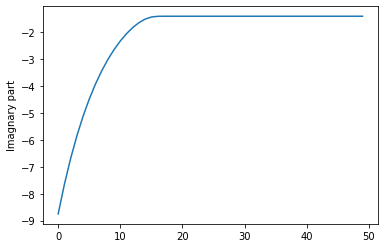

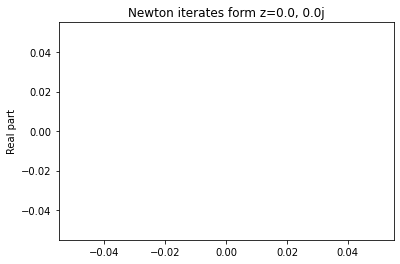

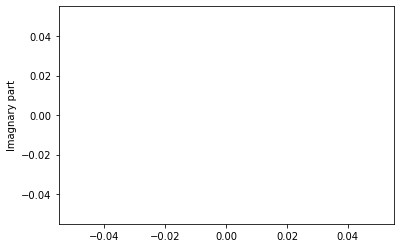

In [45]:
print("raíces de f(z)= z⁸ + 15z⁴ -16")
for zi in z:
    newton_iterates(zi,f8,df8)